In [39]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import pandas as pd
from datetime import datetime, timedelta
from mpl_finance import candlestick_ohlc
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import tweepy
import time
from matplotlib import style

user = []
store_handle = []
search_counter = 0
user_counter = 0


#Report Current Time
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

%matplotlib inline

In [40]:
#Search for mention
bot_reference = "@stock_bot Analyze:"
mention = api.search(bot_reference)

for tweet in mention["statuses"]:
    parse_info = tweet["text"].split("Analyze:")
    if parse_info[1] not in store_handle:
        store_handle.append(parse_info[1])
        user.append(tweet["user"]["screen_name"])
    print(user[search_counter])
    print(store_handle[search_counter])
    search_counter +=1

peter_pan_daz
AAPL
peter_pan_daz
GOOG


In [41]:
#Find today's date
today = datetime.today().strftime('%Y-%m-%d')
print(today)

2018-10-28


In [42]:
#Find three years from today
three_year = (datetime.now() - timedelta(days=3*365)).strftime('%Y-%m-%d')
print(three_year)

2015-10-29


In [47]:
one_year = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')
print(one_year)

2017-10-28


In [50]:
three_month = (datetime.now() - timedelta(days=90)).strftime('%Y-%m-%d')
print(three_month)

2018-07-30


In [48]:
one_month = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')
print(one_month)

2018-09-28


In [43]:
#Daily Data
ticker = store_handle[0]

# User pandas_reader.data.DataReader to load the desired data. As simple as that.

# for ticker in tickers:
panel_data = data.DataReader(ticker, 'iex', three_year, today)
panel_data["Ticker"] = ticker
panel_data["Moving Average"] = panel_data["close"].rolling(window=5).mean()
panel_data["Date"]=panel_data.index
panel_data["Date"]=pd.to_datetime(panel_data["Date"])
panel_data["Date"] = panel_data["Date"].apply(mdates.date2num)

In [44]:
panel_data.head()

,open,high,low,close,volume,Ticker,Moving Average,Date
date,,,,,,,,
2015-10-29,112.4996,114.3857,112.0921,114.2340,51227334,AAPL,NaN,735900.0
2015-10-30,114.6700,114.8880,113.2104,113.2578,49365254,AAPL,NaN,735901.0
2015-11-02,113.6085,115.0207,113.3621,114.8501,32203267,AAPL,NaN,735904.0
2015-11-03,114.4804,117.0394,114.3951,116.1675,45518976,AAPL,NaN,735905.0
2015-11-04,116.6982,117.3522,115.2671,115.6272,44886050,AAPL,114.82732,735906.0


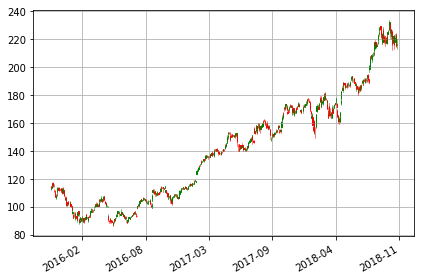

{'created_at': 'Sun Oct 28 17:14:10 +0000 2018',
 'id': 1056594990091055109,
 'id_str': '1056594990091055109',
 'text': '@peter_pan_daz, see your results! https://t.co/T8kM3rZOWi',
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'peter_pan_daz',
    'name': 'Yu-Hsuan Liu',
    'id': 2277380293,
    'id_str': '2277380293',
    'indices': [0, 14]}],
  'urls': [],
  'media': [{'id': 1056594988555857920,
    'id_str': '1056594988555857920',
    'indices': [34, 57],
    'media_url': 'http://pbs.twimg.com/media/DqnHi0RUcAANJs8.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DqnHi0RUcAANJs8.jpg',
    'url': 'https://t.co/T8kM3rZOWi',
    'display_url': 'pic.twitter.com/T8kM3rZOWi',
    'expanded_url': 'https://twitter.com/peter_pan_daz/status/1056594990091055109/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 432, 'h': 288, 'resize': 'fit'},
     'small': {'w': 4

In [45]:
ohlc= panel_data[['Date', 'open', 'high', 'low','close']].copy()

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)

candlestick_ohlc(ax, ohlc.values, width=.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


fig.autofmt_xdate()
fig.tight_layout()
plt.grid()
plt.savefig(f"Pics/{ticker} candlestick for {today}.png")
plt.show()
api.update_with_media(f"Pics/{ticker} candlestick for {today}.png",f"@{user[0]}, see your results for {ticker}!" )